### Classification Models

Machine Learning에서 주된 주제는 분류 모형이다. Logit, Probit 모형에 머물던 분류 모형은 Machine Learning 알고리즘 등장으로 비약한 발전을 이뤘다. Regression Model과 마찬가지로 Classification Model 또한 크게 SVM, Tree Algorithm으로 나뉜다. 여기에 Naive Bayes 계열 모형이 추가되어 총 3개로 나뉜다고 보면 된다

#### 1. Logit / Probit

**1.1 Logit Model**

1958년 영국의 통계학자 Cox가 제안한 확률 모형으로써, 독립변수의 선형 결합을 이용하여 사건의 **발생 가능성**을 예측하는 데 사용되는 통계 기법이다. 독립 변수의 선형 결합으로 종속변수를 설명하는 관점에서는 선형 회귀 분석과 유사하지만, 종속변수가 범주형 데이터를 대상으로 한다는 점에서 분류 모형이라고 할 수 있다

Logit Model은 종속변수 $Y_i$가 1의 값을 갖는 확률 $p_i$를 아래와 같이 가정한다

$$p_i = E(Y_i) = \frac{1}{1+e^{-\mathbf{\beta X_i}}}$$

이진 분류 모형의 경우 아래와 같이 분류를 생각해볼 수 있다

$$p(Y_i = 1) = p_i = \frac{1}{1+e^{-\mathbf{\beta X_i}}} = \frac{e^{\mathbf{\beta X_i}}}{1+e^{\mathbf{\beta X_i}}$$

$$p(Y_i = 0) = 1 - p_i = \frac{1e^{-\mathbf{\beta X_i}}}{1+e^{-\mathbf{\beta X_i}}} = \frac{1}{1+e^{\mathbf{\beta X_i}}$$

추정된 $\hat{p_i}$는 각각 1인 확률과 0인 확률을 추정한다. 여기서 추정된 확률이 0.5보다 크면 1을, 0.5보다 작으면 0으로 처리하는 분류 모형을 고려할 수 있다

odds ratio는 어떤 사건이 일어날 확률을 사건이 일어나지 않을 확률로 나눈 것으로, 아래와 같이 나타낼 수 있다

$$\mathrm{odds} = \frac{p_i}{1-p_i} = e^{\mathbf{\beta X_i}}$$

odds ratio는 상대위험도의 척도로써 다양한 곳에서 사용되지 알아두면 좋다


**1.2 Probit Model**

Probit Model은 종속변수 $Y_i$기 1의 값을 갖는 확률이 다음과 같이 계산되는 모형이다

$$p_i = \int_{- \infty}^{\mathbf{\beta X_i}} \frac{1}{\sqrt{2\pi}} e^{-0.5\epsilon^2} d \epsilon \equiv \Phi (\mathbf{\beta X_i})$$

여기서 $\Phi (\mathbf{\beta X_i})$는 표준정규분포의 누정분포함수를 나타내며, Logit Model과 같이 0과 1 사이의 값을 가지는 확률을 추정한다

한편, 모형의 parameter는 일반적인 선형모델처럼 바로 구할 수는 없으며, Maximum Likelihood Extimation을 사용하여 구할 수 있다. 

Logit Model과 Probit Model 모두 고전적인 통계 모형에서 분류 모형에 해당하는 것으로, sklearn에서는 `Logistic Regression`이 같은 역할을 한다

#### example 1

준비된 `GDP.csv`는 전세계 국가에 대한 특성들을 알맞게 정리한 파일이다. label의 기준은 다음과 같다

- 1인당 GDP가 10000달러 이상인 국가 : 1
- 1인당 GDP가 10000달러 미만인 국가 : 0

Logit과 Probit 모형을 사용해서 아래 데이터에 대해 분류를 해 보자

In [1]:
import numpy as np
import pandas as pd

In [2]:
gdp = pd.read_csv('GDP.csv', index_col = 0)
gdp.head()

,agricultural rate,armed forces size,birth rate,CO2 emissions,CPI,Fertility rate,forested area,gasoline price,gross primary education,gross tertiary deucation,...,minimum wage,health expenditure,physician ratio,labor force participation,tax revenue,total tax rate,unemployment rate,GDP per Capita,urban population rate,label
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.581,323000.0,0.3249,8672.0,149.900000,0.0447,0.021,0.70,1.040,0.097,...,0.43,0.784,0.28,0.489000,0.09300,0.714000,0.111200,502.115487,0.257540,0
Albania,0.431,9000.0,0.1178,4536.0,119.050000,0.0162,0.281,1.36,1.070,0.550,...,1.12,0.569,1.20,0.557000,0.18600,0.366000,0.123300,5352.857411,0.612290,0
Algeria,0.174,317000.0,0.2428,150006.0,151.360000,0.0302,0.008,0.28,1.099,0.514,...,0.95,0.281,1.72,0.412000,0.37200,0.661000,0.117000,3948.343279,0.731890,0
Andorra,0.400,0.0,0.0720,469.0,190.460955,0.0127,0.340,1.51,1.064,0.000,...,6.63,0.364,3.33,0.627381,0.16574,0.408224,0.068864,40886.391162,0.879845,1
Angola,0.475,117000.0,0.4073,34693.0,261.730000,0.0552,0.463,0.97,1.135,0.093,...,0.71,0.334,0.21,0.775000,0.09200,0.491000,0.068900,2973.591160,0.661770,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0.245,343000.0,0.1788,164175.0,2740.270000,0.0227,0.527,0.00,0.972,0.793,...,0.01,0.458,1.92,0.597000,0.16574,0.733000,0.088000,16915.493453,0.882400,1
Vietnam,0.393,522000.0,0.1675,192668.0,163.520000,0.0205,0.481,0.80,1.106,0.285,...,0.73,0.435,0.82,0.774000,0.19100,0.376000,0.020100,2715.276036,0.366280,0
Yemen,0.446,40000.0,0.3045,10609.0,157.580000,0.0379,0.010,0.92,0.936,0.102,...,0.01,0.810,0.31,0.380000,0.16574,0.266000,0.129100,922.929642,0.372730,0


데이터를 우선 불러오도록 한다

In [3]:
gdp.drop('GDP per Capita', axis = 1, inplace = True)

분류에 사용된 1인당 GDP는 삭제하도록 한다. 정보의 중복이 발생하기 때문이다

In [4]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X = gdp.drop(['label','armed forces size','infant mortality','maternal mortality ratio','tax revenue','total tax rate','forested area','gasoline price','physician ratio','Fertility rate','gross primary education'], axis = 1)
X = sm.add_constant(X)
y = gdp['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
logit_model = sm.Logit(y_train, X_train)

result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.101234
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                  117
Model:                          Logit   Df Residuals:                      105
Method:                           MLE   Df Model:                           11
Date:                Wed, 15 Nov 2023   Pseudo R-squ.:                  0.8497
Time:                        22:28:26   Log-Likelihood:                -11.844
converged:                       True   LL-Null:                       -78.823
Covariance Type:            nonrobust   LLR p-value:                 2.749e-23
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       -10.9502     22.020     -0.497      0.619     -54

Logit Model 추정 결과 Pseudo $R^2$가 약 0.85 정도로 나타났다. 예측 성능이 상당히 뛰어난 것으로 보인다

In [5]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred_prob = result.predict(X_test)
y_pred = (result.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.79      0.87        34
           1       0.70      0.94      0.80        17

    accuracy                           0.84        51
   macro avg       0.83      0.87      0.84        51
weighted avg       0.87      0.84      0.85        51


`sklearn.metrics`내의 `classification_report`를 통해 간단한 metric을 볼 수 있다. 각각의 통계량에 대해서는 11장의 내용을 참고하도록 하자.

의사결정에서 비용이 어떤 것이 큰지에 따라 선호되는 metric이 달라질 수 있다. 이는 프로젝트의 성격에 따라 취사선택할 수 있다

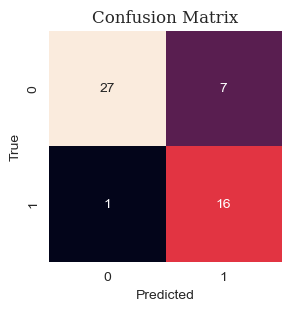

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (3, 3))
sns.heatmap(cm, annot = True, fmt = 'd', cbar = False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix', fontsize = 12, fontfamily = 'Serif')
plt.show()

Model이 얼마나 잘 분류했는지를 보는 과정 중 가장 유명한 것은 위와같이 **혼동 행렬(Confusion Matrix)** 를 보는 것이다. 혼동 행렬은 아래와 같이 나타낸다

<center>

|                     | Predicted positive | Predicted negative |
|:-------------------:|:------------------:|:------------------:|
| **Actual positive** |   True Positive    |   False negative   |
| **Actual negative** |   False positive   |   True Negative    |

</center>


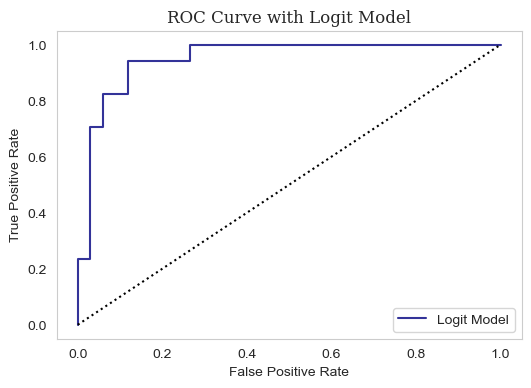

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, classification_report, roc_curve

y_pred_prob = result.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize = (6, 4))
plt.plot(fpr, tpr, label = 'Logit Model', color = 'navy', alpha = 0.8)
plt.plot([0, 1], [0, 1], 'k:')
plt.grid(False)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Logit Model', fontsize = 12, fontfamily = 'Serif')
plt.legend()
plt.show()

ROC curve는 모형의 성능을 보는 가장 유명한 방법 중 하나이다. **이진 분류** 모형에서만 작동하며, 예측하는 class가 세 개 이상인 경우에는 작동하지 않음에 유의한다. ROC curve 아래의 면적을 AUC라고 하며, 이 면적이 클수록 모형의 성능이 좋다고 한다

보통 금융 머신러닝 프로젝트에서는 AUC가 0.6~0.7정도면 훌륭한 결과임으로 굳이 점수에 연연할 필요는 없다

probit model의 경우를 살펴보자

In [8]:
probit_model = sm.Probit(y_train, X_train)

result = probit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.100664
         Iterations 12
                          Probit Regression Results                           
Dep. Variable:                  label   No. Observations:                  117
Model:                         Probit   Df Residuals:                      105
Method:                           MLE   Df Model:                           11
Date:                Wed, 15 Nov 2023   Pseudo R-squ.:                  0.8506
Time:                        22:28:26   Log-Likelihood:                -11.778
converged:                       True   LL-Null:                       -78.823
Covariance Type:            nonrobust   LLR p-value:                 2.583e-23
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -5.2951     11.552     -0.458      0.647     -27

Pseudo $R^2$가 조금 더 높은 것을 빼면 Logit Model과 거의 동일한 결과를 보인다

In [9]:
y_pred_prob = result.predict(X_test)
y_pred = (result.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.79      0.87        34
           1       0.70      0.94      0.80        17

    accuracy                           0.84        51
   macro avg       0.83      0.87      0.84        51
weighted avg       0.87      0.84      0.85        51


classification report에서 1인 경우의 recall이 상당히 높다. 즉, 실제 1인 데이터 중에서 1로 예측한 것들이 0.94정도 된다는 의미이다

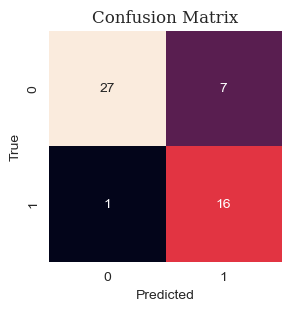

In [10]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (3, 3))
sns.heatmap(cm, annot = True, fmt = 'd', cbar = False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix', fontsize = 12, fontfamily = 'Serif')
plt.show()

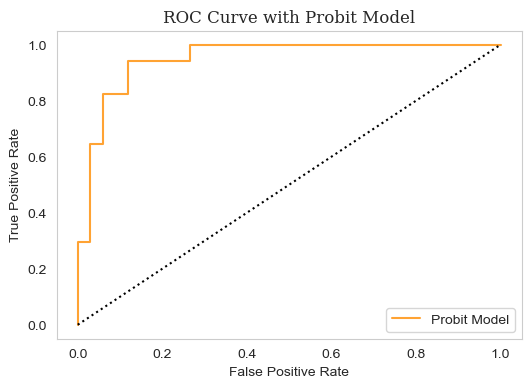

In [11]:
y_pred_prob = result.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize = (6, 4))
plt.plot(fpr, tpr, label = 'Probit Model', color = 'darkorange', alpha = 0.8)
plt.plot([0, 1], [0, 1], 'k:')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Probit Model', fontsize = 12, fontfamily = 'Serif')
plt.grid(False)
plt.legend()
plt.show()

전체적으로 Logit Model과 큰 차이가 없이 성능이 좋은 것으로 나타난다

#### 2. Naive Bayes

모형의 이름에서 볼 수 있듯이 굉장히 Naive한 모형이다. discrete, continuous한 feature들 모두 사용이 가능하며, sklearn에는 다음과 같은 모형이 존재한다

**Discrete Naive Bayes Algorithms**

- `sklearn.naive_bayes.BernoulliNB` : 이진(0 또는 1) 값을 갖는 특성에 적합하다. 텍스트 분류에서 단어의 출현 여부를 이진 특성으로 다룰 때 유용하다고 한다
- `sklearn.naive_bayes.MultinomialNB` : 주로 텍스트 분류 작업에 사용된다. 이 모델은 특성이 다항 분포를 따른다고 가정한다
- `sklearn.naive_bayes.ComplementNB` : 데이터의 분포가 불균형할 때 좋다
- `sklearn.naive_bayes.CategoricalNB` : Categorical Distribution을 가정한다. 성능에 대해서는 그리 많이 알려져 있지 않다

**Continuous Naive Bayes Algorithm**

- `sklearn.naive_bayes.GaussianNB` : 연속적인 값에서 Naive Bayes Classification이 가능하다

그 중 Gaussian Naive Bayes 모형은 feature가 연속적인 경우에 사용되며, 패턴 인식에 큰 장점을 보인다. 무엇보다도, 연산 속도가 타 분류 모형에 비해 굉장히 빠르다는 것이 큰 장점이다

```
sklearn.naive_bayes.GaussianNB(*, priors=None, var_smoothing=1e-09)
```

단 데이터의 특성이 지수 분포족에 따를 때에만 성능이 좋고, feature간에 조건부독립성이 성립하지 않는다면 분류 결과가 치우쳐질 가능성이 높다

#### example 2

example 1의 분류를 Gaussian Naive Bayes Model에 대해 추정해 보자

In [12]:
from sklearn.naive_bayes import GaussianNB

X_train = X_train.drop('const', axis = 1)
X_test = X_test.drop('const', axis = 1)

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [13]:
y_pred = nb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6470588235294118


정확도는 Logit, Probit 모형에 비해 떨어지는 것으로 보인다. 이는 feature 자체가 불완전 분포 특성을 띄기 때문인 것으로 보인다

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.91      0.78        34
           1       0.40      0.12      0.18        17

    accuracy                           0.65        51
   macro avg       0.54      0.51      0.48        51
weighted avg       0.58      0.65      0.58        51


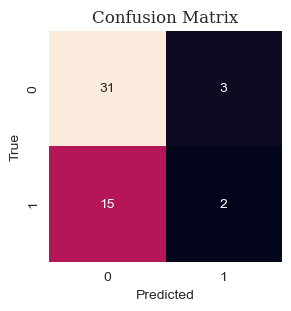

In [15]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (3, 3))
sns.heatmap(cm, annot = True, fmt = 'd', cbar = False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix', fontsize = 12, fontfamily = 'Serif')
plt.show()

Confusion Matrix를 보면 10000달러를 넘는 국가가 전혀 분류가 되지 않는 모습을 볼 수 있다. 즉, 데이터에 대한 신뢰가 의심되는 상황이라면 Naive Bayes 모형은 피하는 것이 좋다

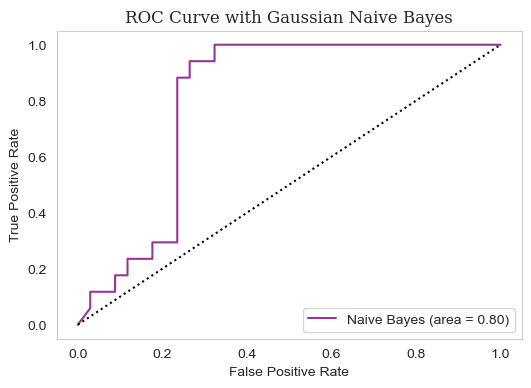

In [16]:
from sklearn.metrics import auc
y_prob = nb_model.fit(X_train, y_train).predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (6, 4))
plt.plot(fpr, tpr, label = 'Naive Bayes (area = {:.2f})'.format(roc_auc), color = 'purple', alpha = 0.8)
plt.plot([0, 1], [0, 1], 'k:')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Gaussian Naive Bayes', fontsize = 12, fontfamily = 'Serif')
plt.grid(False)
plt.legend()
plt.show()

#### 3. Support Vector Machine

```
sklearn.svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, 
                probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, 
                max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
```

In [17]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear',
          C = 0.1, 
          probability = True,
          random_state = 42)
svc.fit(X_train, y_train)

SVC(C=0.1, kernel='linear', probability=True, random_state=42)

In [18]:
y_prob = svc.predict_proba(X_test)[:, 1]
y_pred = svc.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7450980392156863


In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.62      0.76        34
           1       0.57      1.00      0.72        17

    accuracy                           0.75        51
   macro avg       0.78      0.81      0.74        51
weighted avg       0.86      0.75      0.75        51


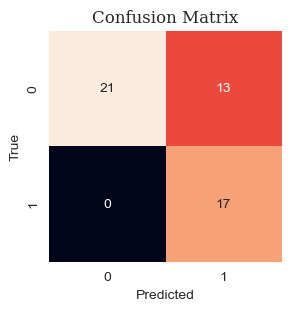

In [20]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (3, 3))
sns.heatmap(cm, annot = True, fmt = 'd', cbar = False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix', fontsize = 12, fontfamily = 'Serif')
plt.show()

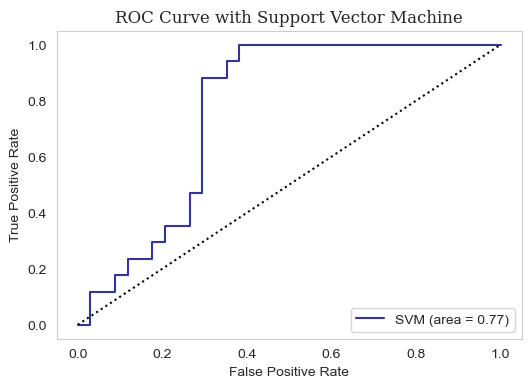

In [21]:
y_prob = svc.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (6, 4))
plt.plot(fpr, tpr, label = 'SVM (area = {:.2f})'.format(roc_auc), color = 'navy', alpha = 0.8)
plt.plot([0, 1], [0, 1], 'k:')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Support Vector Machine', fontsize = 12, fontfamily = 'Serif')
plt.grid(False)
plt.legend()
plt.show()

#### 4. Decision Tree

<center><img src = "https://i.stack.imgur.com/Qq0TC.png" alt="My Image"></center>

Tree 모형의 목적은 target 함수를 가장 잘 묘사하는 approximation을 구하는 것이다. Target(종속변수)과 feature사이의 관계를 Tree구조로 구현한 모형이라고 보면 된다

```
sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, 
                                    min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                    max_features=None, random_state=None, max_leaf_nodes=None, 
                                    min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
```

**4.1 분기의 결정**

Tree Model의 분기는 분기를 했을 때 모형의 오차가 작아지는 양이 큰 방향으로 진행되는데, 이 기준을 **Information Gain(정보 이득)** 이라고 한다

$$\mathrm{Information~Gain}(S, A) = \mathrm{IG}(S, A) = H(S) - H(S|A)$$

정보 이득을 계산하기 위한 방법으로는 **Gini Impurity(지니 불순도)** 와 **Entropy**가 있다

$$\mathrm{Gini}(\pi) = \sum_{c=1}^C \Big( \pi_c (\sum_{i \neq c} \pi_i)\Big) = \sum_{c=1}^C \pi_c - \sum_{c=1}^C \pi_c^2 = 1 - \sum_{c=1}^C \pi_c^2$$
$$\mathrm{Gini~Gain~=~Gini~Impurity~before~split - Gini~Impurity~after~split}$$



$$\mathrm{Entropy} = H(Y|X) = -\sum_{x} p(x) \sum_{x} H(Y| X = x)$$
$$\mathrm{Entropy~Gain~=~Entropy~Impurity~before~split - Entropy~Impurity~after~split}$$

즉, 두 정보 기준의 최적화 문제는 Information Gain의 극대화 문제와 동일한 해를 가진다

<center><img src = "https://ekamperi.github.io/images/decision_trees/gini_vs_entropy.png" alt="My Image"></center>

Impurity Measure를 비교하면 0부터 1까지 정의된 모든 확률 구간에서 Entropy가 크게 측정된다. 즉, threshold가 낮은 구간에서 Gini Impurity에 비해 Entropy가 더 분기에 강건한 경향을 보인다

**4.2 Feature Importance**

Tree의 특징을 생각해 볼 때, 어떤 Node와 해당 Children Node 사이의 정보량에 별 차이가 없다면 그 Node에 할당된 attribute는 적어도 그 위치에서는 분류에 기여하는 바가 없다고 볼 수 있다. 이 경우, feature importance는 0으로 계산된다. 

분기를 할 때마다 어떤 feature를 기준으로 분기를 하였는지 저장을 하는데, 이 저장된 데이터를 모형 추정 이후에 보는 것을 **특성 중요도(feature importance)** 라고 한다

Children Node의 수가 두 개일 경우 node의 중요도는 다음과 같이 계산할 수 있다

$$
f_{kj}=
\begin{cases}
\frac{n_j}{n} \Big(g_j - \frac{n_{jL}}{n_j} g_{jL} - \frac{n_{jR}}{n_j} \Big), & \mbox{    if }x_k\mbox{ is assigned to node } j\\
0, & \mbox{    otherwise}
\end{cases}
$$

여기서 $f_{kj}$는 노드 j에 배정된 feature $k$의 중요성이고, $g$는 information gain이다. $R$과 $L$은 각각 분기시 오른쪽 자식 노드와 왼쪽 자식 노드를 의미한다. Feature k가 지정된 모든 node들의 중요도를 더해 feature k의 중요도를 계산한다

$$f_k = \frac{\Sigma_{j}f_{kj}}{\Sigma_k \Sigma_j f_{kj}}$$

Decision Tree를 비롯하여 Tree기반 Ensemble 모형은 모두 attribute에 대해서 상대적 중요성을 확인할 수 있다. Feature Selection 용도로 확인할 수 있으며, 최근 특성 중요도를 응용하여 추론을 시도하는 연구가 이뤄지고 있다

금융 머신러닝 연구는 feature importance를 중심으로 이뤄지고 있다

#### example 4

example 1의 분류 모형을 가져와서 Decision Tree모형으로 분류를 진행해 보자. 여기서 criterion은 entropy, random_state는 42를 지정하도록 한다

In [22]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion = 'entropy',
                              random_state = 42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [23]:
y_prob = tree.predict_proba(X_test)[:, 1]
y_pred = tree.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.803921568627451


Naive Bayes, SVM에 비해 out of sample에서 높은 정확도를 보인다

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85        34
           1       0.68      0.76      0.72        17

    accuracy                           0.80        51
   macro avg       0.78      0.79      0.79        51
weighted avg       0.81      0.80      0.81        51


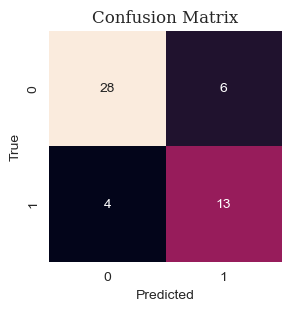

In [25]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (3, 3))
sns.heatmap(cm, annot = True, fmt = 'd', cbar = False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix', fontsize = 12, fontfamily = 'Serif')
plt.show()

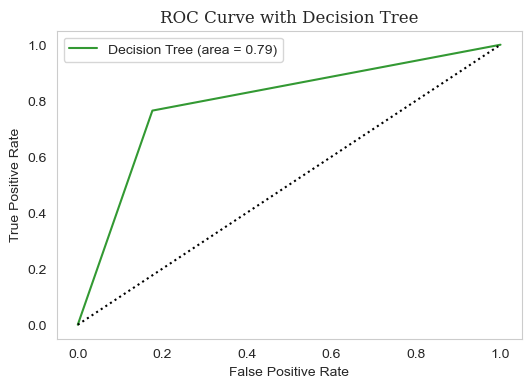

In [26]:
y_prob = tree.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (6, 4))
plt.plot(fpr, tpr, label = 'Decision Tree (area = {:.2f})'.format(roc_auc), color = 'green', alpha = 0.8)
plt.plot([0, 1], [0, 1], 'k:')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Decision Tree', fontsize = 12, fontfamily = 'Serif')
plt.grid(False)
plt.legend()
plt.show()

AUC의 점수를 보면 꽤나 높은 것을 볼 수 있다

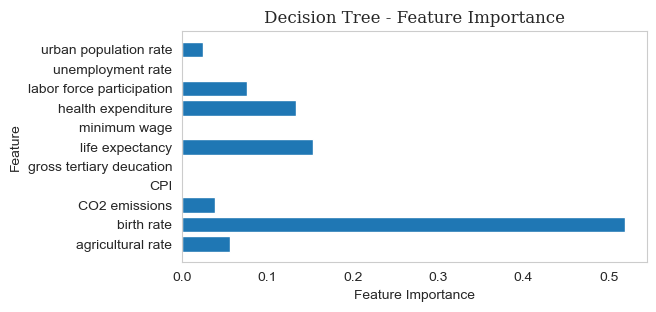

In [27]:
importance = tree.feature_importances_
feature_names = X_train.columns

plt.figure(figsize = (6, 3))
plt.barh(range(len(importance)), importance, align="center")
plt.yticks(np.arange(len(importance)), feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.grid(False)
plt.title("Decision Tree - Feature Importance", fontsize = 12, fontfamily = 'Serif')
plt.show()

모형에 `feature_importances_` 속성을 사용하면 계산된 특성 중요도를 볼 수 있다. 분기에 어떤 정보들을 많이 사용하였는지 확인 가능하다